# 3. Unsupervised Learning

-: No Label on Data
-: No Instructor
The model learning from itself

# Methods Used
1. Transformation of the dataset
2. Clustring

# 1. Unsupervised transformation

* It is a type of algorithm that create a new representation of data which might be easier for humans or other machine learning algorithms to understand.

* A Commen example is dimensionality reduction. An application for dimensionality reduction is reduce data in 2d for visualization purpose.

# 2. Clustring Algorithms

* Partition data into distinct group of items.

## Preprocessing and Scaling

In supervised learning algorithms like SVM and Neural Network are very senstive to scaling of the data. Therefore, a common practice is to adjust the features so that the representation is more suitable for these algorithms.
* Often, this is a sample per-feature rescaling and shift of the data below.

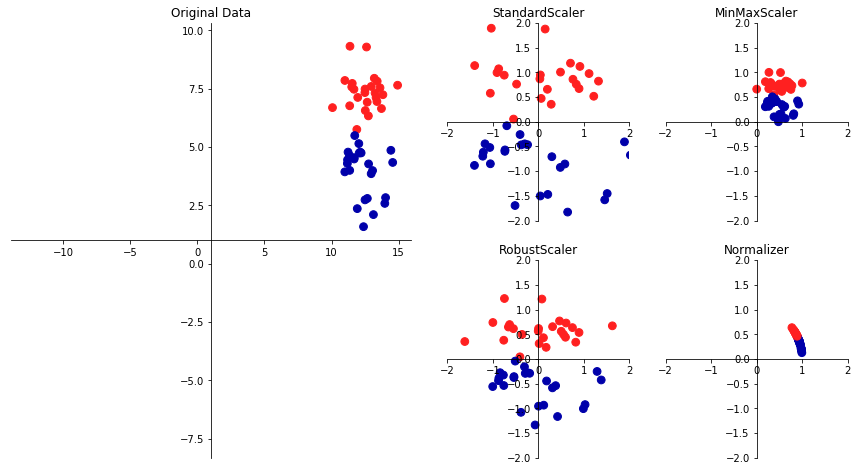

In [2]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()
plt.show()

* Standard Scaler-: It ensure that for each feature the mean 0 and the varience is 1.
* Robust Scaler-: It ensures statstical properties for each feature that guarantee that they on the same scale. It uses median 
    and quartiles instead of mean and varience.
* MinMaxScaler :- It shift the data such that all features are exactly between 0 and 1.
* Normalizer :- It does a different kind of rescaling. It scales each data point such that the feature vector has a Euclidian    length of 1.

# Now, Applying Data Transformation

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(426, 30)
(143, 30)
(426,)


# Xn=(X-Xmin)/(Xmax-Xmin)

In [10]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
#transform data
X_train_scaled=scaler.transform(X_train)

# Print dataset property before and after scaling dataset
print('Transformed shape: {}'.format(X_train_scaled.shape))
print('per-feature minimum before scaling: \n {}'.format(X_train.min(axis=0)))
print('per-feature maximum before scaling: \n {}'.format(X_train.max(axis=0)))
print('per-feature minimum after scaling: \n {}'.format(X_train_scaled.min(axis=0)))
print('per-feature maximum after scaling: \n {}'.format(X_train_scaled.max(axis=0)))

Transformed shape: (426, 30)
per-feature minimum before scaling: 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


* The transformed data has the same shape as the original data- the feature are simply shifted and scaled. You can that all of the features are now between 0 and 1, as desired.

In [15]:
X_test_scaled=scaler.transform(X_test)
print('per-feature minimum after scaling: \n {}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling: \n {}'.format(X_test_scaled.min(axis=0)))

per-feature minimum after scaling: 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling: 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1. Some of the features are even outside the 0–1 range! The explanation is that the MinMaxScaler (and all the other scalers) always applies exactly the same transformation to the training and the test set. This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set.

# Applying on make_blobs dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

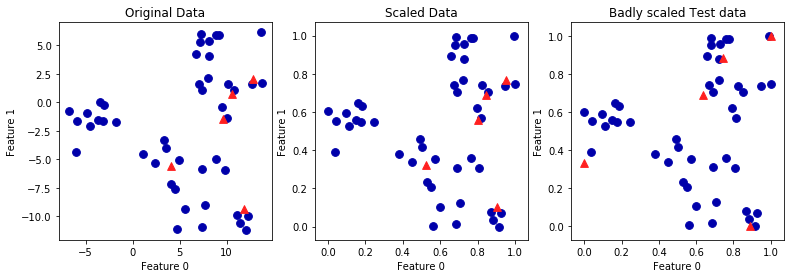

In [28]:
from sklearn.datasets import make_blobs
import mglearn
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label="Test set",s=60)
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),s=60,label="Training set")
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=mglearn.cm2(1),s=60,label="Test set",marker='^')
axes[1].set_title("Scaled Data")

#rescale the test set seperatly, so the test set min is 0 and test set max=1
# Warning: DO NOT DO THIS! For illustration purpose only
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly=test_scaler.transform(X_test)

# Visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60,marker='o')
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],c=mglearn.cm2(1),label="Bad test data",s=60,marker='^')
axes[2].set_title("Badly scaled Test data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

# Comparing all scaler algorithms behaviour on Cancer Dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

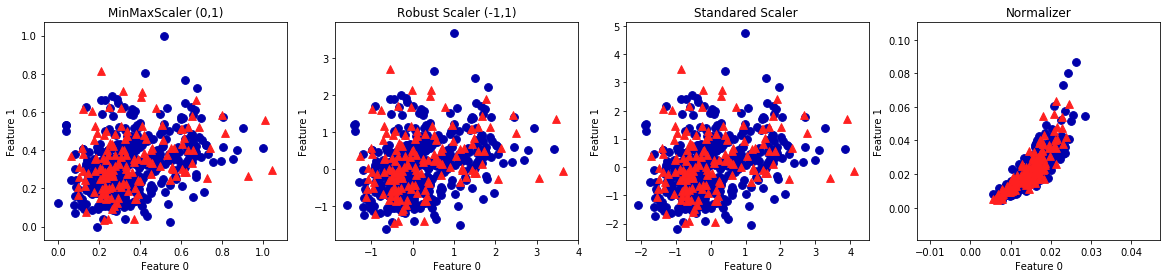

In [50]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,Normalizer

fig,axes=plt.subplots(1,4,figsize=(20,4))

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=5)

# MinMaxScaler = (Xi-Xmin)/(Xmax-Xmin)
mms_train=MinMaxScaler().fit(X_train).transform(X_train)
mms_test=MinMaxScaler().fit(X_train).transform(X_test)

axes[0].scatter(mms_train[:,0],mms_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(mms_test[:,0],mms_test[:,1],c=mglearn.cm2(1),s=60,marker='^',label='Test set')
axes[0].set_title('MinMaxScaler (0,1)')

# Robust Scaler
rs_train=RobustScaler().fit(X_train).transform(X_train)
rs_test=RobustScaler().fit(X_train).transform(X_test)

axes[1].scatter(rs_train[:,0],rs_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(rs_test[:,0],rs_test[:,1],c=mglearn.cm2(1),s=60,marker='^',label='Test set')
axes[1].set_title("Robust Scaler (-1,1)")

# Standerd Scaler = (Xi-mean(X)/(stdev(X))
ss_train=StandardScaler().fit(X_train).transform(X_train)
ss_test=StandardScaler().fit(X_train).transform(X_test)

axes[2].scatter(ss_train[:,0],ss_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[2].scatter(ss_test[:,0],ss_test[:,1],c=mglearn.cm2(1),s=60,marker='^',label='Test set')
axes[2].set_title("Standared Scaler ")

# Normalizer
N_train=Normalizer().fit(X_train).transform(X_train)
N_test=Normalizer().fit(X_train).transform(X_test)

axes[3].scatter(N_train[:,0],N_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[3].scatter(N_test[:,0],N_test[:,1],c=mglearn.cm2(1),label="Test set",s=60,marker='^')
axes[3].set_title("Normalizer")

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

# The Effect of Preprocessing on Supervised Learning

In [55]:
# The C in SVC tells the SVM optimization how much you want to avoid misclassifying each training example.

from sklearn.svm import SVC

svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy: 0.62


* Using MinMaxScaler

In [58]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print('Test set accuracy after preprocessing: {:.2f}'.format(svm.score(X_test_scaled,y_test)))

Test set accuracy after preprocessing: 0.96


* Using Standard Scaler

In [59]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test_scaled,y_test)))

Test set accuracy: 0.97


* Using Normalizer

In [60]:
scaler=Normalizer()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test_scaled,y_test)))

Test set accuracy: 0.95


* Using Robust Scaler

In [61]:
scaler=RobustScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test_scaled,y_test)))

Test set accuracy: 0.97
